# Multilayer artificial neuron regression

## Objectives

* **Understand** the concept of regression,
* **Learn and Explore** about the mathematical principles behind regression problems,
* **Create** an algorithm for regression problems,
* **Observe** the performance of the algorithm trained.

## The problem: Predict values

<p style='text-align: justify;'>
So far, we have used all the knowledge of artificial intelligence solely for classification problems. Based on one or more variables, it is possible to classify an item into class $X$, $Y$, or $Z$.
</p>
<p style='text-align: justify;'>
However, there are other types of problems that can be solved with the knowledge that artificial intelligence provides, such as regression problems. These are prediction problems characterized by situations where we need to forecast a value based on predefined variables, such as predicting wind speed based on air humidity or the value of a health insurance plan based on the age of the beneficiary.
</p>  

## The solution: Regression

<p style='text-align: justify;'>
Regression is a powerful statistical technique that shows the connection between a dependent variable ($Y$) and one or more independent variables ($X$). The main goal is to find the best line that represents this correlation, allowing for dependable predictions or inferences.
</p>
<p style='text-align: justify;'>
Linear regression is primarily categorized into simple and multiple linear regression. Simple linear regression concerns itself with a solitary autonomous variable, while multiple linear regression accommodates two or more independent variables.
</p>
<p style='text-align: justify;'>
The crux of the linear regression function resides in error calculation. In the following problems, we are going to use the <a href="https://en.wikipedia.org/wiki/Mean_squared_error">Mean Squared Error (MSE)</a>, which gauges the disparity between the data points and the line forged by the model. MSE calculation entails extracting the predicted values from the regression model, deducting the corresponding actual values, squaring these discrepancies, summing them, and ultimately dividing by the total number of data points. The resultant value, the average squared discrepancy, indicates the model's adeptness in fitting the data. Once an acceptable fit is achieved, the linear regression model can predict $Y$ values for novel $X$ values not part of the initial dataset.
</p>
<p style='text-align: justify;'>
However, the effectiveness of the regression model may decrease if the relationship between the variables is not strictly proportional, as is the case in a linear function. This limitation comes from the simplicity of the method and its reliance on a linear connection between the variables. But what if the relationship between our variables is not linear? And what if we have multiple variables to consider? That's where the artificial neuron comes in. It allows for predictions in more complex situations that are not necessarily linear, expanding the possibilities of predictive modeling. 
</p>  

## ☆ Challenge #1 (linear): Orange weight prediction ☆

<p style='text-align: justify;'>
Suppose you are studying the relationship between the weight of oranges and their diameter. You collected data from different oranges, measuring their weight in pounds and diameter in inches. Now, you want to use linear regression to predict the weight of an orange based on its diameter.
</p>  

| Diameter (in) | Weight (lb) |
| :-:          | :-:      |
|     2.36	      |    0.265   |
|     2.76        |    0.353   |
|     3.15        |    0.375   |
|     3.54        |    0.441   |
|     3.94        |    0.507   |
|     4.33        |    0.595   |
|     4.72        |    0.595   |
|     5.12        |    0.705   |
|     5.51        |    0.794   |


### ☆ Solution ☆

<p style='text-align: justify;'>
First, given two arrays that describe the behavior of the variables, let's first plot the graph to better visualize the data.
</p>




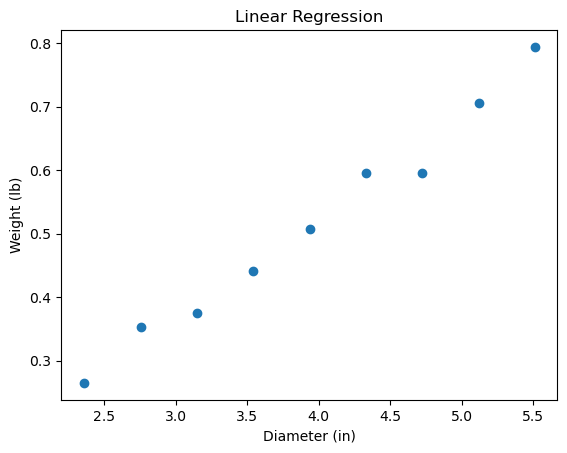

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Training data
x_train = np.array([2.36, 2.76, 3.15, 3.54, 3.94, 4.33, 4.72, 5.12, 5.51])  # Diameter
y_train = np.array([0.265, 0.353, 0.375, 0.441, 0.507, 0.595, 0.595, 0.705, 0.794])  # Weight


# Scatter plot
plt.scatter(x_train, y_train)
plt.xlabel('Diameter (in)')
plt.ylabel('Weight (lb)')
plt.title('Linear Regression')
plt.show()

<p style='text-align: justify;'>
Observing the generated graph, it is noticeable that there is a linear behavior as the variables vary. To estimate the line that describes its behavior and predict the values of $X$, it is necessary to perform a linear regression.
</p>

In [44]:
# Function to calculate the regression line
def linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Regression Coeficients
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept

def predict(x, slope, intercept):
    return slope * x + intercept

# Performs linear regression
slope, intercept = linear_regression(x_train, y_train)

# Makes a prediction for a new value
x_new = 5
y_new = predict(x_new, slope, intercept)

print(f"The prediction for x={x_new} is y={y_new}")

The prediction for x=5 is y=0.6840830373352276


<p style='text-align: justify;'>

Next, we can use the slope  and the intercept value of the linear function to plot the graph of the samples again, this time with the line that best describes their behavior.

</p>

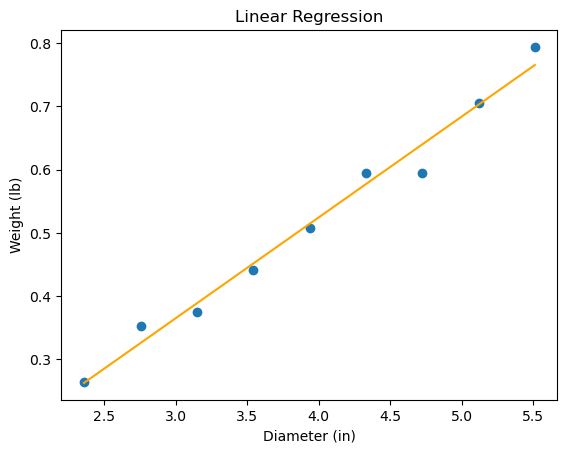

In [45]:
# Calculate linear regression line
regression_line = slope * x_train + intercept

# Scatter plot
plt.scatter(x_train, y_train)
plt.plot(x_train, regression_line, color='orange')
plt.xlabel('Diameter (in)')
plt.ylabel('Weight (lb)')
plt.title('Linear Regression')
plt.show()

## ☆ Challenge #2 (non-linear): Orange weight prediction ☆

<p style='text-align: justify;'>
A farmer is interested in predicting the weight of oranges based on their characteristics. He has collected a dataset that includes the diameter, color, and texture of the peel of each orange, along with the corresponding weight. The goal is to develop a regression model using a multilayer artificial neuron to predict the weight of oranges based on these characteristics. The collected features are as follows:</p>

- **Diameter**: the diameter of the orange in inches. </br>

- **Color**: a measure of the color of the orange on a scale from $0$ to $1$, where $0$ represents green oranges and $1$ represents ripe oranges.</br>

- **Texture**: a measure of the texture of the orange peel on a scale from $0$ to $1$, where $0$ represents smooth peel and $1$ represents rough peel.</br>

<p style='text-align: justify;'>
The weight of the oranges has been measured in pounds and is the output variable that we want to predict. Your goal as a data scientist is to train a multilayer regression artificial neuron using the collected data to make accurate predictions of the weight of oranges based on the features of diameter, color, and texture. Here is the data colected:
</p>

| Diameter (in) | Color | Texture | Weight (lb) |
| :-:           | :-:   | :-:     | :-:      |
| 2.99213           | 0.4   | 0.3     | 0.286      |
| 3.11024           | 0.2   | 0.1     | 0.320      |
| 2.67717           | 0.6   | 0.4     | 0.243      |
| 2.51969           | 0.5   | 0.2     | 0.209      |
| 3.22835           | 0.3   | 0.5     | 0.353      |
| 2.83465           | 0.4   | 0.3     | 0.265      |
| 2.59843           | 0.2   | 0.2     | 0.220      |
| 2.79528           | 0.3   | 0.4     | 0.298      |
| 2.71654           | 0.5   | 0.1     | 0.253      |
| 3.14961           | 0.6   | 0.3     | 0.331      |


### ☆ Solution ☆

Plotting the graphs of the relationship between weight and each dependent variable, we can see that they do not necessarily have a linear relationship:

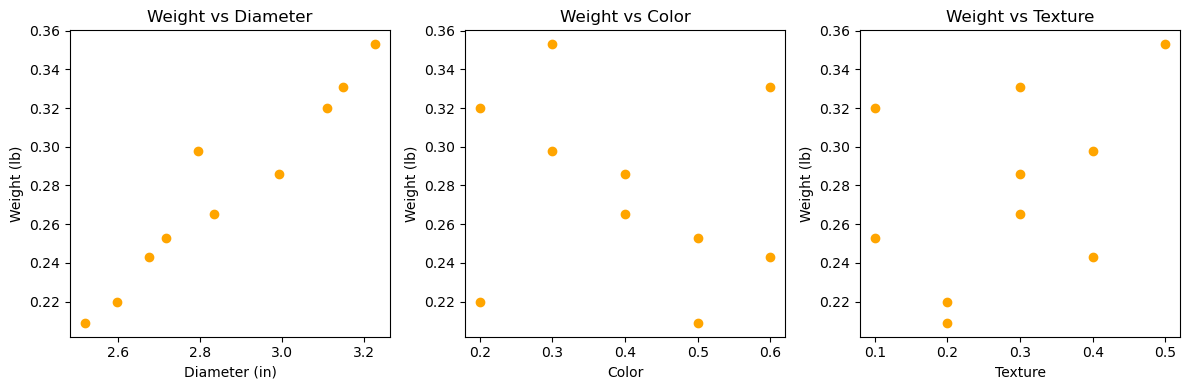

In [46]:
import matplotlib.pyplot as plt

# Data from the table
diameter = [2.99213, 3.11024, 2.67717, 2.51969, 3.22835, 2.83465, 2.59843, 2.79528, 2.71654, 3.14961]
color = [0.4, 0.2, 0.6, 0.5, 0.3, 0.4, 0.2, 0.3, 0.5, 0.6]
texture = [0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.2, 0.4, 0.1, 0.3]
weight = [0.286, 0.320, 0.243, 0.209, 0.353, 0.265, 0.220, 0.298, 0.253, 0.331]

# Plotting the graphs
plt.figure(figsize=(12, 4))

# Graph of weight against diameter
plt.subplot(1, 3, 1)
plt.scatter(diameter, weight, color='orange')
plt.xlabel('Diameter (in)')
plt.ylabel('Weight (lb)')
plt.title('Weight vs Diameter')

# Graph of weight against color
plt.subplot(1, 3, 2)
plt.scatter(color, weight, color='orange')
plt.xlabel('Color')
plt.ylabel('Weight (lb)')
plt.title('Weight vs Color')

# Graph of weight against texture
plt.subplot(1, 3, 3)
plt.scatter(texture, weight,  color='orange')
plt.xlabel('Texture')
plt.ylabel('Weight (lb)')
plt.title('Weight vs Texture')

# Displaying the graphs
plt.tight_layout()
plt.show()

Therefore, in this case, a linear regression model will not solve the problem efficiently. Instead, we built a neural network to predict the values:

In [47]:
import numpy as np

class MultilayerArtificialNeuron:
    def __init__(self, num_inputs, hidden_layers, num_outputs):
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs
        self.weights = self._initialize_weights()

    def _initialize_weights(self):
        weights = []
        layer_sizes = [self.num_inputs] + self.hidden_layers + [self.num_outputs]

        for i in range(1, len(layer_sizes)):
            layer_weights = np.random.randn(layer_sizes[i], layer_sizes[i-1])
            weights.append(layer_weights)

        return weights

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _forward_pass(self, X):
        activations = [X]

        for i in range(len(self.weights)):
            current_activation = self._sigmoid(np.dot(activations[i], self.weights[i].T))
            activations.append(current_activation)

        return activations

    def _backward_pass(self, X, y, activations, learning_rate):
        num_examples = X.shape[0]
        delta = activations[-1] - y.reshape(-1, self.num_outputs)

        for i in range(len(self.weights)-1, -1, -1):
            weight_gradients = np.dot(delta.T, activations[i])
            self.weights[i] -= (learning_rate / num_examples) * weight_gradients

            delta = np.dot(delta, self.weights[i]) * (activations[i] * (1 - activations[i]))

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            activations = self._forward_pass(X)
            self._backward_pass(X, y, activations, learning_rate)

    def predict(self, X):
        activations = self._forward_pass(X)
        return activations[-1].flatten()

<p style='text-align: justify;'>
After building the artificial neuron, it is time to input the data and train the model, so we can apply the model to other cases:
</p>

In [48]:
# Training data
X = np.array([[2.99213, 0.4, 0.3],
              [3.11024, 0.2, 0.1],
              [2.67717, 0.6, 0.4],
              [2.51969, 0.5, 0.2],
              [3.22835, 0.3, 0.5],
              [2.83465, 0.4, 0.3],
              [2.59843, 0.2, 0.2],
              [2.79528, 0.3, 0.4],
              [2.71654, 0.5, 0.1],
              [3.14961, 0.6, 0.3]])

y = np.array([0.286, 0.320, 0.243, 0.209, 0.353, 0.265, 0.220, 0.298, 0.253, 0.331])

# Data normalization
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y_normalized = (y - np.mean(y)) / np.std(y)

# Create an instance of Multilayer artificial neuron
multilayer_artificial_neuron = MultilayerArtificialNeuron(num_inputs=3, hidden_layers=[4, 4], num_outputs=1)

# Train the model
multilayer_artificial_neuron.train(X_normalized, y_normalized, epochs=100, learning_rate=0.1)

# Test data
X_test = np.array([[3.07087, 0.4, 0.2],
                   [2.6378, 0.3, 0.3],
                   [2.75591, 0.6, 0.5]])

# Normalize the test data
X_test_normalized = (X_test - np.mean(X, axis=0)) / np.std(X, axis=0)

# Make predictions for the test data
predictions_normalized = multilayer_artificial_neuron.predict(X_test_normalized)

# Denormalize the output predictions
predictions = (predictions_normalized * np.std(y)) + np.mean(y)

print("Predictions:")
for i in range(len(X_test)):
    print("Orange {}: Predicted Weight: {:.2f}lb".format(i+1, predictions[i]))

Predictions:
Orange 1: Predicted Weight: 0.28lb
Orange 2: Predicted Weight: 0.28lb
Orange 3: Predicted Weight: 0.28lb


## ☆ Challenge #3: Wind speed prediction ☆

Wind speed is an important factor that can affect the growth and yield of oranges. The farmer has collected historical data on wind speed for the last two days with the objective to check suitability for orange cultivation. Each sample consists of a measurement of wind speed (in meters per second) and other data collected at the same time, which is available in _datasets_ folder, named as `wind_data_train.csv`. 

In order to ensure ideal growth conditions, the same farmer wishes to develop a prediction system that determines the wind speed based on the historical data.

You are tasked with training the model using the provided data and then testing it using a separate test dataset, named `wind_data_test.cs` located in the _datasets_ directory.

### ☆ Solution ☆

#### ⊗ Import Python packages

In [49]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

#### ⊗ Creating the layers

<p style='text-align: justify;'>
First, we need to read the input files and process their data. Remember that what will be predicted is the wind speed at 10 meters (ws_10), so $y$ should have the last row, and $x$ should not have the last row.
</p>

In [50]:
# Read the input file:
train_df = pd.read_csv("./datasets/wind/wind_data_train.csv", sep=",", header=0)
test_df = pd.read_csv("./datasets/wind/wind_data_test.csv", sep=",", header=0)

values_title = list(train_df.columns.values)

# Separate features and targets
y_train = train_df.iloc[:, [-1]]
x_train = train_df.iloc[:, [*range(len(values_title)-1)]]

y_test = test_df.iloc[:, [-1]]
x_test = test_df.iloc[:, [*range(len(values_title)-1)]]

Now, armed with the data collected from the `.csv` files, we can proceed to present and visualize the information through reporting and data plotting.

----------train data info------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       44640 non-null  int64  
 1   Min       44640 non-null  int64  
 2   glo_avg   44640 non-null  float64
 3   diff_avg  44640 non-null  float64
 4   lw_avg    44640 non-null  float64
 5   tp_sfc    44640 non-null  float64
 6   humid     44640 non-null  float64
 7   press     44640 non-null  float64
 8   wd_10m    44640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.1 MB
None
   day  Min  glo_avg  diff_avg  lw_avg  tp_sfc  humid   press  wd_10m
0    1    0   -4.276    -1.804   347.4   20.53   79.9  904.91   196.8
1    1    1   -4.356    -1.801   347.3   20.47   80.1  904.97   197.6
2    1    2   -4.359    -1.780   348.0   20.40   80.2  904.97   209.5
3    1    3   -4.239    -1.711   348.8   20.37   80.2  905.03   212.9
4    1    4   -4.206

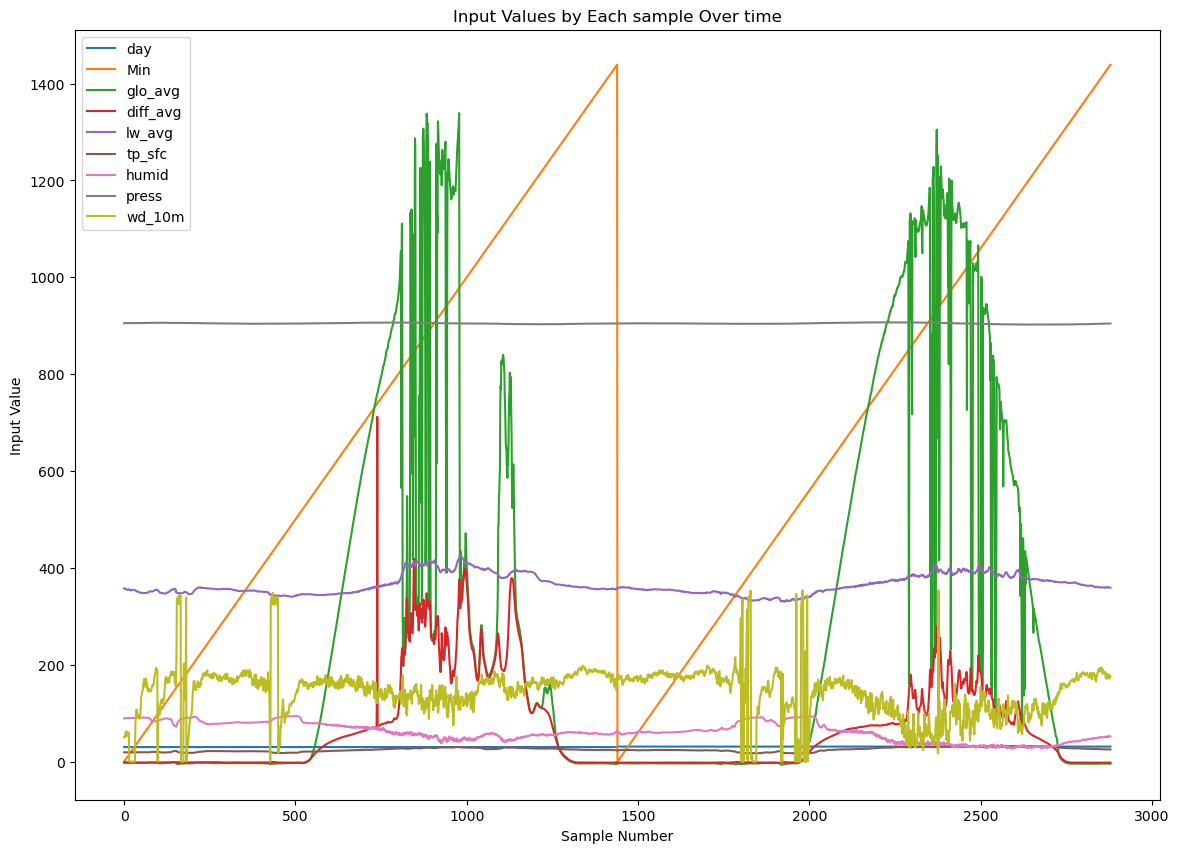

In [51]:
# Show data:
print("----------train data info------------")
print(x_train.info())
print(x_train.head())
print(y_train.head())

print("----------test  data info------------")
print(x_test.info())
print(x_test.head())
print(y_test.head())

# Plot the comparison
plt.figure(figsize=(14, 10))
plt.plot(x_test, label=x_test.columns)
plt.title("Input Values by Each sample Over time")
plt.xlabel("Sample Number")
plt.ylabel("Input Value")
plt.legend()

plt.show()

In this graph, we can see the final result, where the following data is represented:

- **day**: Represents the day when the data was collected,
- **Min**: Represents the minute when the data was collected,
- **glo_avg**: Average global solar radiation,
- **diff_avg**: Indicates the average diffuse solar radiation,
- **lw_avg**: Refers to the average net solar radiation,
- **tp_sfc**: Surface temperature,
- **humid**: Humidity level,
- **press**: Atmospheric pressure,
- **wd_10m**: Represents the wind direction at 10 meters above the ground.

#### ⊗ Process data

With the collected data in hand, it's time to process it. The code below performs two essential operations when processing data in Python:

- Handling <strong>NaNs</strong> and <strong>Infs</strong>:

This process deals with any occurrences of positive and negative infinity (np.inf and -np.inf) in both the $x\_train$ and $x\_test$ data, replacing them with NaN (Not a Number). After that, the NaN values are filled with the mean value of their respective columns in x_train.

- Normalizing inputs using <strong>StandardScaler</strong>:

StandardScaler is a preprocessing technique used to scale (normalize) the features (columns) of the data to have a mean of $0$ and a standard deviation of $1$. Normalization plays a crucial role in many machine learning algorithms, as it ensures that all features have similar scales. This prevents some features from dominating others during model training.
</p>

In [52]:
# Fill or drop NaNs and Infs
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_train = x_train.fillna(x_train.mean())

x_test = x_test.replace([np.inf, -np.inf], np.nan)
x_test = x_test.fillna(x_train.mean())

# Convert dataframes to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Normalize inputs
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<p style='text-align: justify;'>
Now, create PyTorch tensors and dataloaders:
</p>

In [53]:
# Convert numpy arrays to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create dataloaders
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=50, shuffle=True)

#### ⊗ Define the model
After that, we can create a new neural network model class using the PyTorch library by inheriting the ```Module``` class.

In [54]:
# Define the model
class Model(nn.Module):
    def __init__(self, n_features):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(n_features, n_features)
        self.layer2 = nn.Linear(n_features, 90)
        self.layer3 = nn.Linear(90, 90)
        self.layer4 = nn.Linear(90, 90)
        self.layer5 = nn.Linear(90, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = torch.tanh(self.layer3(x))
        x = torch.tanh(self.layer4(x))
        return self.layer5(x)

#### ⊗ Training the network with PyTorch

<p style='text-align: justify;'>
With the model created, it's time to begin training. Once the epoch number is defined, we proceed by training the model using batches of inputs to obtain predicted outputs. We calculate the mean squared error (MSE) loss between the predicted outputs and the actual labels, and then perform backpropagation to compute the gradients of the loss with respect to the model's parameters.
</p>
<p style='text-align: justify;'>

At the end of each epoch, we print the average loss of the neural network for that epoch to monitor the training progress.
<p style='text-align: justify;'>

Always remember to check if the model has already been trained and saved. If so, the pre-trained model will be loaded instead of retraining it.
</p>

In [55]:
# Train the model
model_path = "./models/wind_prediction.pt"

if not os.path.exists(model_path):
    if not os.path.exists("./models"):
        os.makedirs("./models")

    model = Model(x_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.RMSprop(model.parameters(), lr=0.01)

    for epoch in range(30):  # Loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_dl, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss / i}')

    torch.save(model.state_dict(), model_path)
    print('Finished Training')
else:
    print('Model already trained. Loading model...')
    model = Model(x_train.shape[1])
    model.load_state_dict(torch.load(model_path))


Epoch 1, Loss: 0.5316217590808334
Epoch 2, Loss: 0.42509839244420755
Epoch 3, Loss: 0.3511837138355847
Epoch 4, Loss: 0.3184006590011943
Epoch 5, Loss: 0.30104190389304153
Epoch 6, Loss: 0.2841116980202663
Epoch 7, Loss: 0.28167566035627783
Epoch 8, Loss: 0.2746562468464332
Epoch 9, Loss: 0.27169218068031986
Epoch 10, Loss: 0.2705642800410633
Epoch 11, Loss: 0.26907307155129623
Epoch 12, Loss: 0.26861894733769476
Epoch 13, Loss: 0.2687118142726309
Epoch 14, Loss: 0.26928100967153307
Epoch 15, Loss: 0.2646188206486237
Epoch 16, Loss: 0.2626746686367577
Epoch 17, Loss: 0.26054710147259214
Epoch 18, Loss: 0.2626260655927952
Epoch 19, Loss: 0.26192355134227885
Epoch 20, Loss: 0.2682491975247593
Epoch 21, Loss: 0.2705091687061327
Epoch 22, Loss: 0.2681991267498299
Epoch 23, Loss: 0.2641471429172519
Epoch 24, Loss: 0.2654907088726759
Epoch 25, Loss: 0.26628015119365245
Epoch 26, Loss: 0.26138453210616325
Epoch 27, Loss: 0.26128213024894487
Epoch 28, Loss: 0.26681820509512594
Epoch 29, Loss: 

#### ⊗ Testing the trained model

In order to test and validate your results, you should compare the predictions generated by the trained model with the actual wind speeds measured by an anemometer, which are available in the `.csv` files.

<p style='text-align: justify;'>
To effectively analyze this, consider plotting a new graph that visually compares the two datasets. If the two lines overlap or follow a similar pattern, it indicates that the model is making accurate predictions and capturing variations in wind speed adequately. However, if the lines differ significantly, it may suggest issues with prediction accuracy.
</p>

<p style='text-align: justify;'>
This, with mean absolute error (MAE) and mean squared error (MSE), will provide valuable insights into the accuracy and performance of the model's predictions in relation to the real-world measurements.

</p>

Test MSE: 0.22301127016544342 | Test MAE: 0.38484743


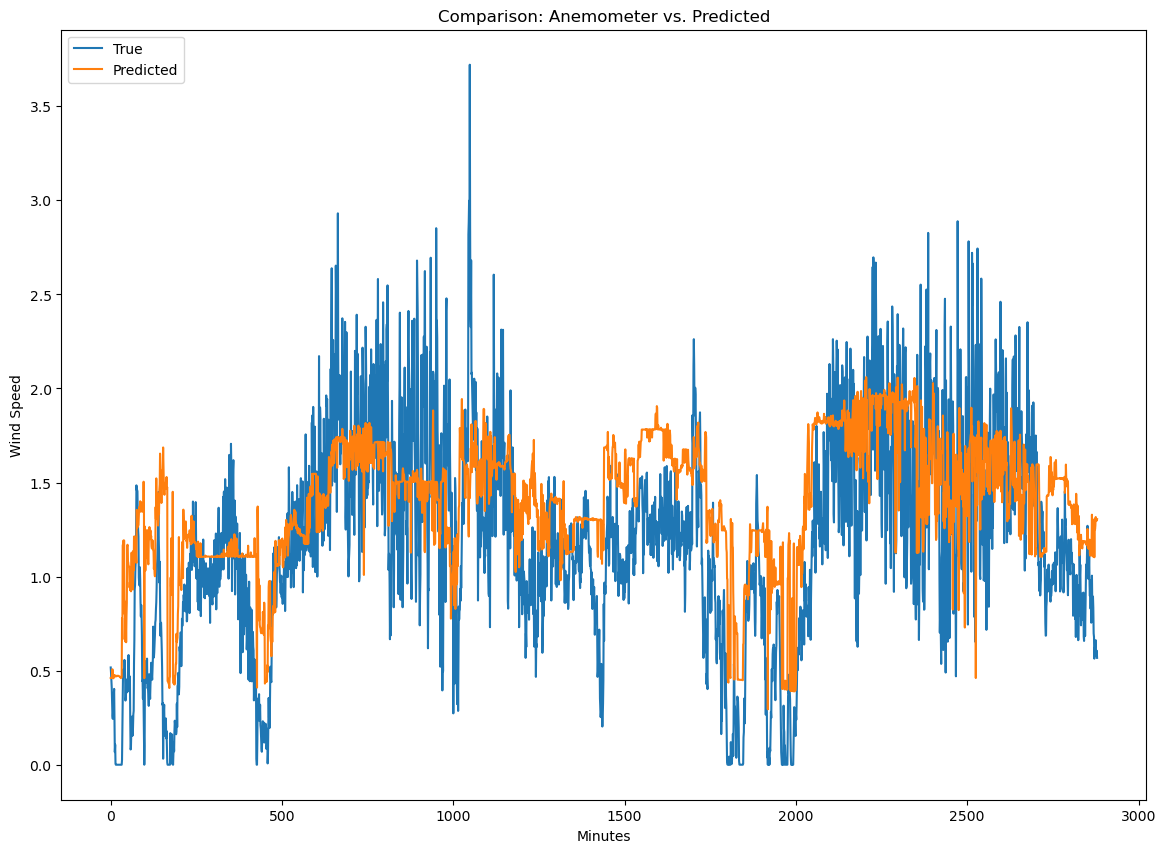

In [56]:
# Test the model
model.eval()
with torch.no_grad():
    predictions = model(x_test)
    mse = criterion(predictions, y_test)
    mae = mean_absolute_error(y_test.numpy(), predictions.numpy())
print('Test MSE:', mse.item(), '| Test MAE:', mae)

# Plot the comparison
plt.figure(figsize=(14, 10))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.xlabel('Minutes')
plt.ylabel('Wind Speed')
plt.title('Comparison: Anemometer vs. Predicted')
plt.legend(loc='upper left')
plt.show()

## Summary

<p style='text-align: justify;'>
In this notebook, we learned the concept of regression in an approach to a new problem: predicting values based on a pattern. We also applied all the concepts in practice, in two simple data analysis problems. Despite its limitations, the linear regression model is highly effective in predicting values for proportional systems. To surpass a linear regression model, we can use a multilayer artificial neuron to predict values in non-linear models with a large number of variables precisely.</br>
</p>

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [57]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

In the next nootebook you will learn about overfitting in multilayer artificial neurons [_04-multilayer-artificial-neuron-fitting.ipynb_](04-multilayer-artificial-neuron-fitting.ipynb).